# Penguin Data Analysis

## Library Import

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Data Ingestion & Inspection

In [72]:
# Load the penguins dataset - available in seaborn's built-in datasets
df = sns.load_dataset('penguins')
df.head()

# # Save to DataFrame to CSV
# df.to_csv('penguins_dataset.csv', index=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [73]:
# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [74]:
# Display DataFrame basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [75]:
# Check for missing values
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

## Data Cleaning

In [76]:
# Create a copy for cleaning
cleaned_df = df.copy()

In [77]:
# Check for duplicates and remove them if necessary
duplicates_exist = cleaned_df.duplicated().any()
initial_rows = len(cleaned_df)

if duplicates_exist:
    cleaned_df = cleaned_df.drop_duplicates()
    duplicates_removed = initial_rows - len(cleaned_df)
    print(f"Found and removed {duplicates_removed} duplicate rows")
else:
    print("No duplicate rows found")

No duplicate rows found


In [78]:
# Check for missing values and remove or fill them
missing_counts = cleaned_df.isnull().sum()
total_missing = missing_counts.sum()

if total_missing > 0:
    print(f"Found {total_missing} missing values")
    
    # Drop rows that are more than 50% empty
    # Calculate how much data is missing in each row
    missing_per_row = cleaned_df.isnull().sum(axis=1)
    total_columns = len(cleaned_df.columns)
    missing_percentage = (missing_per_row / total_columns) * 100
    
    bad_rows = missing_percentage > 50
    rows_dropped = bad_rows.sum()
    
    if rows_dropped > 0:
        cleaned_df = cleaned_df[~bad_rows]  # Keep only good rows
        print(f"Dropped {rows_dropped} rows with more than 50% missing data")
    
    # Fill remaining missing values
    # For numbers: use the median (middle value)
    numeric_cols = cleaned_df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if cleaned_df[col].isnull().any():
            median_val = cleaned_df[col].median()
            missing_count = cleaned_df[col].isnull().sum()
            cleaned_df[col].fillna(median_val, inplace=True)
            print(f"Filled {missing_count} missing values in '{col}' with median: {median_val:.2f}")
    
    # For categories: use 'missing' as placeholder
    categorical_cols = cleaned_df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if cleaned_df[col].isnull().any():
            missing_count = cleaned_df[col].isnull().sum()
            cleaned_df[col] = cleaned_df[col].fillna('Missing')
            print(f"Filled {missing_count} missing values in '{col}' with 'missing'")
else:
    print("No missing values found")

Found 19 missing values
Dropped 2 rows with more than 50% missing data
Filled 9 missing values in 'sex' with 'missing'


## Data Visualisation

In [79]:
numeric_cols = cleaned_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = cleaned_df.select_dtypes(include=[object]).columns.tolist()

print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")

Numeric columns: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Categorical columns: ['species', 'island', 'sex']


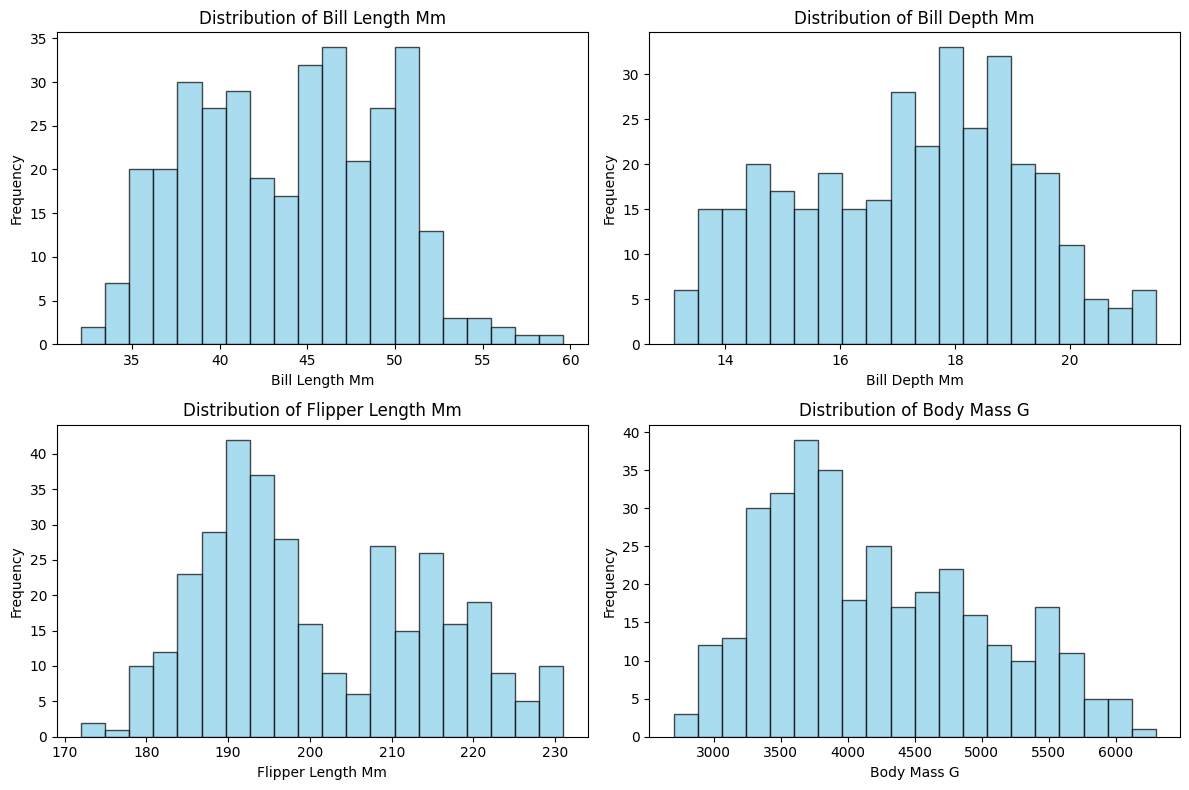

Created distribution plots for 4 numeric columns


In [80]:
# Distribution plots for numeric columns
if numeric_cols:
    n_numeric = len(numeric_cols)
    n_cols = 2
    n_rows = (n_numeric + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    
    # Handle single plot case
    if n_numeric == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes if n_numeric > 1 else [axes]
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numeric_cols):
        ax = axes[i] if n_numeric > 1 else axes[0]
        ax.hist(cleaned_df[col], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        ax.set_title(f'Distribution of {col.replace("_", " ").title()}')
        ax.set_xlabel(col.replace("_", " ").title())
        ax.set_ylabel('Frequency')
    
    # Hide unused subplots
    if n_numeric < len(axes):
        for i in range(n_numeric, len(axes)):
            axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    print(f"Created distribution plots for {n_numeric} numeric columns")

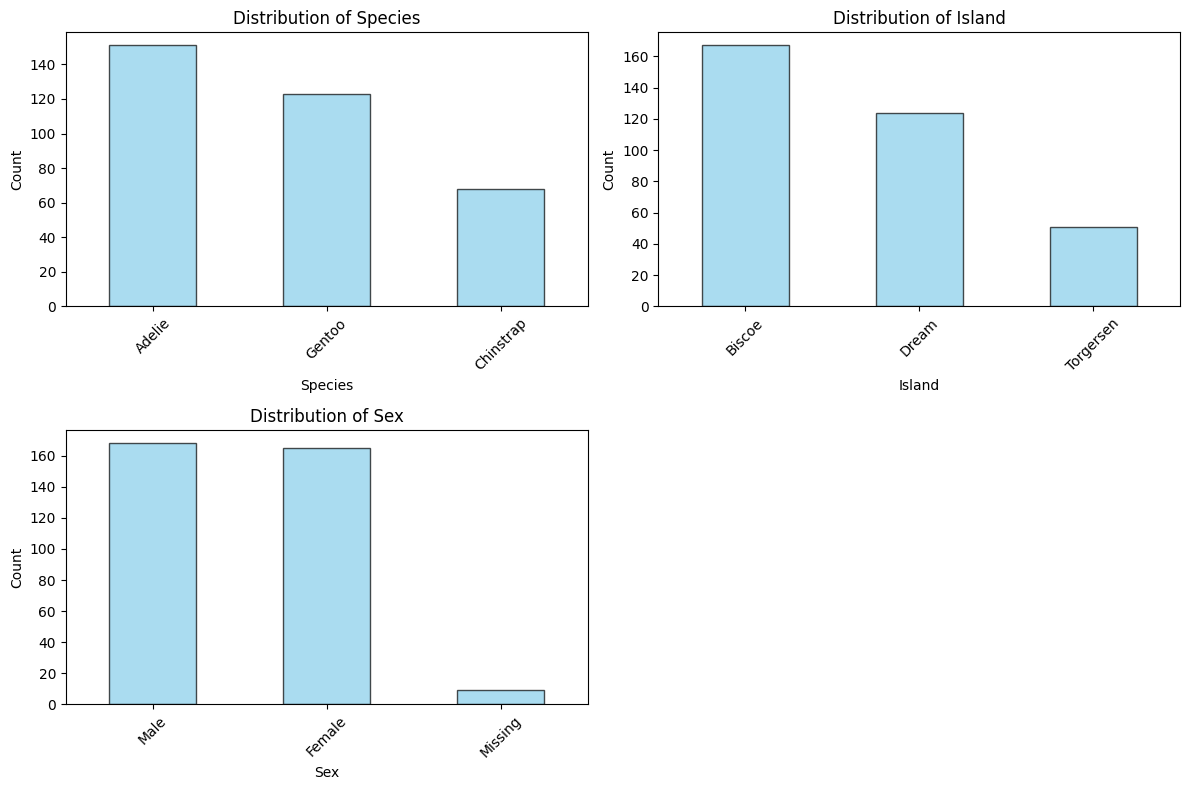

Created bar charts for 3 categorical columns


In [81]:
# Bar charts for categorical columns
if categorical_cols:
    n_categorical = len(categorical_cols)
    n_cols = 2
    n_rows = (n_categorical + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    
    # Handle single plot case
    if n_categorical == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes if n_categorical > 1 else [axes]
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(categorical_cols):
        ax = axes[i] if n_categorical > 1 else axes[0]
        value_counts = cleaned_df[col].value_counts()
        value_counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
        ax.set_title(f'Distribution of {col.replace("_", " ").title()}')
        ax.set_xlabel(col.replace("_", " ").title())
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)
    
    # Hide unused subplots
    if n_categorical < len(axes):
        for i in range(n_categorical, len(axes)):
            axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    print(f"Created bar charts for {n_categorical} categorical columns")

## Correlation Analysis

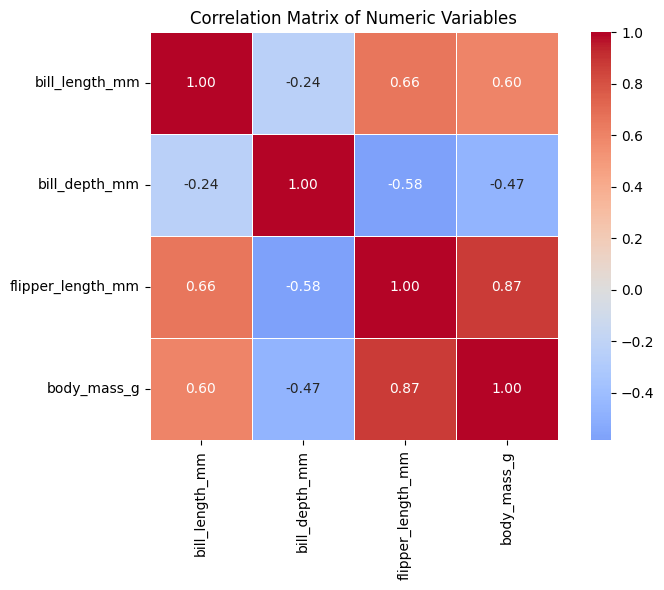

Created correlation heatmap


In [82]:
# Correlation Analysis
if len(numeric_cols) > 1:
    plt.figure(figsize=(8, 6))
    correlation_matrix = cleaned_df[numeric_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, fmt='.2f')
    plt.title('Correlation Matrix of Numeric Variables')
    plt.tight_layout()
    plt.show()
    print("Created correlation heatmap")

## Species Classification

In [83]:
# X and y data preparation
X = cleaned_df.drop('species', axis=1)
y = cleaned_df['species']

X_categorical_cols = [col for col in categorical_cols if col != 'species']
if len(X_categorical_cols) > 0:
    print(f"Encoding categorical columns: {X_categorical_cols}")
        
    for col in X_categorical_cols:
        # Simple label encoding: convert categories to numbers
        unique_values = X[col].unique()
        value_to_number = {value: i for i, value in enumerate(unique_values)}
        X[col] = X[col].map(value_to_number)
        print(f"  {col}: {value_to_number}")

X = X.drop('island', axis=1) # Removing 'island' as it is causes data leakage
    
print(f"\nFeatures (X): {list(X.columns)}")
print(f"Target (y): {y.name}")
print(f"Data shape: {X.shape[0]} rows, {X.shape[1]} features")

Encoding categorical columns: ['island', 'sex']
  island: {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
  sex: {'Male': 0, 'Female': 1, 'Missing': 2}

Features (X): ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
Target (y): species
Data shape: 342 rows, 5 features


In [84]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [86]:
# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
        
# Make predictions
y_pred = model.predict(X_test)

In [87]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
        
print(f"\nMODEL RESULTS:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")


MODEL RESULTS:
Accuracy: 0.990
Training samples: 239
Test samples: 103


In [89]:
# Feature importance
feature_importance = dict(zip(X.columns, model.feature_importances_))
print(f"Feature Importance:")
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"  {feature}: {importance:.3f}")
        
# Classification report
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))

Feature Importance:
  bill_length_mm: 0.377
  flipper_length_mm: 0.270
  bill_depth_mm: 0.253
  body_mass_g: 0.093
  sex: 0.008

Classification Report:
              precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        45
   Chinstrap       0.95      1.00      0.98        21
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.99       103
   macro avg       0.98      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103

